## NOMAD-PARSER-NEXUS/DATACONVERTER demo for Atom Probe Microscopy (APM) data

### **Step 1:** Check that everything is ready to go and download example data for APM. 

In [3]:
! pip list | grep 'h5py\|nexus\|jupyter' && jupyter serverextension list && jupyter labextension list && python -V

h5py                 3.7.0
jupyter_client       7.3.5
jupyter-core         4.11.1
jupyter-server       1.19.1
jupyterlab-h5web     6.0.1
jupyterlab-pygments  0.2.2
nexusutils           0.0.1
config dir: /home/mkuehbach/.jupyter
    jupyterlab_h5web  enabled 
    - Validating...
      jupyterlab_h5web 5.0.0 OK
    jupyter_nbextensions_configurator  enabled 
    - Validating...
      jupyter_nbextensions_configurator 0.4.1 OK
config dir: /home/mkuehbach/.local/etc/jupyter
    jupyterlab  enabled 
    - Validating...
      jupyterlab 3.4.3 OK
    jupyterlab_h5web  enabled 
    - Validating...
      jupyterlab_h5web 5.0.0 OK
JupyterLab v3.4.3
/home/mkuehbach/.local/share/jupyter/labextensions
        jupyterlab_pygments v0.2.2 enabled OK (python, jupyterlab_pygments)
        jupyterlab-h5web v5.0.0 enabled OK (python, jupyterlab_h5web)
        @jupyter-widgets/jupyterlab-manager v3.1.0 enabled OK (python, jupyterlab_widgets)

Python 3.7.14


Set the nexusparser directory.

In [44]:
import os
print('Current working directory')
print(os.getcwd())
nexus_dir = os.getcwd().replace('/examples/apm', '')
# import nexusutils
# nexus_dir = os.path.dirname(nexusutils.__file__)
print('Base/home/root directory of the nomad-parser-nexus')
print(nexus_dir)

Current working directory
/home/mkuehbach/SPRINT-9/20221006_refactor_nomad_parser_nexus/nomad-parser-nexus/examples/apm
Base/home/root directory of the nomad-parser-nexus
/home/mkuehbach/SPRINT-9/20221006_refactor_nomad_parser_nexus/nomad-parser-nexus


### **Step 2:** Download APM-specific example data.

For this case, the data can be found in zenodo.

In [14]:
import shutil  # unpacks in current path unless an additional path argument is provided

In [15]:
# http://dx.doi.org/10.5281/zenodo.6808516
! curl --output APM.LEAP.Datasets.1.zip https://zenodo.org/record/6808516/files/APM.LEAP.Datasets.1.zip
shutil.unpack_archive('APM.LEAP.Datasets.1.zip')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  127M  100  127M    0     0  1507k      0  0:01:26  0:01:26 --:--:-- 1059k


These files should serve exclusively as examples. <font color="orange">The dataconverter for APM always requires a triplet of files</font>:
* A **community or vendor file** with the ion positions and mass-to-charge state ratio values for the tomographic reconstruction. POS, ePOS, or APT are allowed.
* A file with **ranging definitions**, i.e. how mass-to-charge-state ratio values map on ion species. RNG or RRNG are allowed.
* A **file with additional metadata (edited manually or via an ELN) in YAML format**. The eln_data_apm.yaml file in the example can be edited with a text editor.
For GUI-based editing, a NOMAD OASIS instance is needed.<br>
<font color="red">Please note that the metadata inside the provided eln_data_apm.yaml file has example data in it.</font>
<font color="red">These reflect not necessarily the conditions when the raw data for the example were given. The file is meant to be edited!</font>

### **Step 3:** Run your APM-specific dataconverter/readers/ on the example data.

Now we run our parser. The --reader flag takes the atom probe microscopy reader (apm), the --nxdl flag takes the application definition for this technique.<br> 

Inspect what can/should be in the NeXus file.

In [27]:
! echo {nexus_dir}

/home/mkuehbach/SPRINT-9/20221006_refactor_nomad_parser_nexus/nomad-parser-nexus


### **Step 3a:** Optionally see the command line help of the dataconverter.

In [28]:
! python3 {nexus_dir}/nexusutils/dataconverter/convert.py --help

Usage: convert.py [OPTIONS]

  The CLI entrypoint for the convert function

Options:
  --input-file TEXT               The path to the input data file to read.
                                  (Repeat for more than one file.)
  --reader [example|apm|transmission|json_map|json_yml|em_nion|ellips|em_spctrscpy|mpes|hall]
                                  The reader to use. default="example"
  --nxdl TEXT                     The name of the NXDL file to use without
                                  extension.
  --output TEXT                   The path to the output NeXus file to be
                                  generated.
  --generate-template             Just print out the template generated from
                                  given NXDL file.
  --fair                          Let the converter know to be stricter in
                                  checking the documentation.
  --params-file FILENAME          Allows to pass a .yaml file with all the
                             

### **Step 3b:** Optionally explore all paths which NXapm provides.

In [29]:
# to inspect what can/should all be in the NeXus file
! python3 {nexus_dir}/nexusutils/dataconverter/convert.py --nxdl NXapm --generate-template

{
    "/ENTRY[entry]/@version": "None",
    "/ENTRY[entry]/COORDINATE_SYSTEM_SET[coordinate_system_set]": "None",
    "/ENTRY[entry]/COORDINATE_SYSTEM_SET[coordinate_system_set]/TRANSFORMATIONS[transformations]": "None",
    "/ENTRY[entry]/DATA[data]": "None",
    "/ENTRY[entry]/MONITOR[monitor]": "None",
    "/ENTRY[entry]/USER[user]/address": "None",
    "/ENTRY[entry]/USER[user]/affiliation": "None",
    "/ENTRY[entry]/USER[user]/email": "None",
    "/ENTRY[entry]/USER[user]/name": "None",
    "/ENTRY[entry]/USER[user]/orcid": "None",
    "/ENTRY[entry]/USER[user]/orcid_platform": "None",
    "/ENTRY[entry]/USER[user]/role": "None",
    "/ENTRY[entry]/USER[user]/social_media_name": "None",
    "/ENTRY[entry]/USER[user]/social_media_platform": "None",
    "/ENTRY[entry]/USER[user]/telephone_number": "None",
    "/ENTRY[entry]/atom_probe/FABRICATION[fabrication]/capabilities": "None",
    "/ENTRY[entry]/atom_probe/FABRICATION[fabrication]/identifier": "None",
    "/ENTRY[entry]/atom_p

### **Step 3c**: Convert the files in the example into an NXapm-compliant NeXus HDF5 file.

In [31]:
! python3 {nexus_dir}/nexusutils/dataconverter/convert.py \
--reader apm \
--nxdl NXapm \
--input-file R31_06365-v02.pos \
--input-file R31_06365-v02.rrng \
--input-file eln_data_apm.yaml \
--output usa_pos.nxs

Using apm reader to convert the given files:  
• R31_06365-v02.pos
• R31_06365-v02.rrng
• eln_data_apm.yaml 
Parsing numerical data and metadata from reconstructed dataset...
Extracting data from POS file: R31_06365-v02.pos
Parsing numerical data and metadata from ranging definitions file...
Extracting data from RRNG file: R31_06365-v02.rrng
Parsing metadata as well as numerical data from NOMAD OASIS ELN...
Parsing entry...
Parsing user...
Parsing sample...
Parsing instrument header...
Parsing fabrication...
Parsing analysis chamber...
Parsing reflectron...
Parsing local electrode...
Parsing detector...
Parsing stage_lab...
Parsing specimen_monitoring...
Parsing control software...
Parsing pulser...
Parsing reconstruction...
Parsing ranging...
Creating default plottable data...
Create default plots on-the-fly...
--> Enter histogram computation 
(4868202, 3)
Default plot 3D discretized reconstruction at 1nm binning.
--> Enter mass spectrum computation 
(4868202, 1)
Plot mass spectrum at

The key take home message is that the command above-specified triggers the automatic creation of the HDF5 file. This *.nxs file, is an HDF5 file.

### **Step 4:** Inspect the HDF5/NeXus file apm*.test.nxs using H5Web.

In [32]:
from jupyterlab_h5web import H5Web

In [33]:
h5_file_name = 'usa_pos.nxs'

In [34]:
H5Web(h5_file_name)

<jupyterlab_h5web.widget.H5Web object>

You can also visualize the .nxs file by double clicking on it in the file explorer panel to the left side of your jupyter lab screen in the browser.

### **Step 5:** Optionally, do some post-processing with the generated usa_pos.nxs file.

To compute a mass-to-charge histogram and explore eventual ranging definitions that have also been carried over in the conversion step (step 6).

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 300
import h5py as h5
#needs shutils for decompressing zip archives, which is a default module/package in Python since >=v3.6

Read mass-to-charge-state ratio values, create a histogram ("mass spectrum"), and mark ranges.

In [36]:
# load data and ranges
hf = h5.File(h5_file_name, 'r')
mq = hf['entry/atom_probe/mass_to_charge_conversion/mass_to_charge'][:]
nions = np.uint32(hf['entry/atom_probe/ranging/number_of_ion_types'])
print('Array with mass-to-charge-state ratios loaded')
print(str(nions) + ' iontypes were distinguished')

Array with mass-to-charge-state ratios loaded
27 iontypes were distinguished


In [37]:
# define binning
[mqmin, mqmax] = [0., 100.0]  # Da np.max(mq)]
print('Dataset ranging from [' + str(mqmin) + ', ' + str(mqmax) +'] Da.')
mqincr = 0.01 #Da
print('Using a mass-to-charge-state ratio resolution of '+str(mqincr)+' Da.')

Dataset ranging from [0.0, 100.0] Da.
Using a mass-to-charge-state ratio resolution of 0.01 Da.


In [38]:
# transform collection of mass-to-charge-state ratios into a histogram
hst1d = np.unique(np.uint64(np.floor((mq[np.logical_and(mq >= mqmin, mq <= mqmax)] - mqmin) / mqincr)), return_counts=True)
nbins = np.uint64((mqmax - mqmin) / mqincr + 1)
print('Histogram has ' + str(nbins) + ' bins.')

Histogram has 10001 bins.


In [39]:
# use matplotlib and numpy to plot histogram data 
xy = np.zeros([nbins, 2], np.float64)
xy[:,0] = np.linspace(mqmin + mqincr, mqmax + mqincr, nbins, endpoint=True)
xy[:,1] = 0.5  # * np.ones([nbins], np.float64)  # 0.5 to be able to plot logarithm you can not measure half an atom
for i in np.arange(0, len(hst1d[0])):
    binidx = hst1d[0][i]
    xy[binidx, 1] = hst1d[1][i]
print('Mass-to-charge-state histogram created.')

Mass-to-charge-state histogram created.


Mass-to-charge-state histogram visualized.


(0.5, 10099999.995)

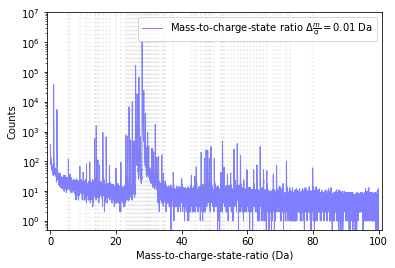

In [40]:
[xmi, xmx, ymi, ymx] = [mqmin, 10**np.ceil(np.log10(mqmax)), 0.5, 10**np.ceil(np.log10(np.max(xy[:,1])))]
[xmi, xmx, ymi, ymx] = [mqmin, mqmax, 0.5, 10**np.ceil(np.log10(np.max(xy[:,1])))]
fig, cnts_over_mq = plt.subplots(1, 1)
plt.plot(xy[:, 0], xy[:, 1], color='blue', alpha=0.5, linewidth=1.0)
for i in np.arange(1,nions + 1):
    # load ranges and plot them
    ranges = hf['entry/atom_probe/ranging/peak_identification/ion' + str(i) + '/mass_to_charge_range'][:]
    for min_max in ranges:
        cnts_over_mq.vlines(min_max[0], 0, 1, transform=cnts_over_mq.get_xaxis_transform(), alpha=0.1, color='grey', linestyles='dotted')
        cnts_over_mq.vlines(min_max[1], 0, 1, transform=cnts_over_mq.get_xaxis_transform(), alpha=0.1, color='grey', linestyles='dotted')
        #rng = Rectangle((min_max[0], ymi), min_max[1] - min_max[0], ymx - ymi, edgecolor='r', facecolor="none")
# plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['Min', '0.0025', '0.025', '0.25', '0.50', '0.75', '0.975', '0.9975', 'Max'])
plt.yscale('log')
plt.legend( [r'Mass-to-charge-state ratio $\Delta\frac{m}{q} = $'+str(mqincr)+' Da'], loc='upper right')
plt.xlabel(r'Mass-to-charge-state-ratio (Da)')
plt.ylabel(r'Counts')
print('Mass-to-charge-state histogram visualized.')
# scale bar with add margin to the bottom and top of the yaxis to avoid that lines fall on x axis
margin=0.01  # polishing the margins
plt.xlim([-margin * (xmx - xmi) + xmi, +margin * (xmx - xmi) + xmx])
plt.ylim([ymi, +margin * (ymx - ymi) + ymx])

In [41]:
#save the figure
figfn = h5_file_name + '.MassToChargeStateRatios.png'
fig.savefig(figfn, dpi=300, facecolor='w', edgecolor='w', orientation='landscape', format='png', 
            transparent=False, bbox_inches='tight', pad_inches=0.1, metadata=None)
#plt.close('all')
print(figfn + ' stored to disk.')

usa_pos.nxs.MassToChargeStateRatios.png stored to disk.


### Further comments:

* Feel free to explore our atom probe microscopy containers in the north branch for more advanced processing

In [ ]:
### Contact person for this example in FAIRmat:
Markus Kühbach